### **Import Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Library**

In [ ]:
import tensorflow as tf
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import seaborn as sns
import gc 
import pandas as pd

### **Load Data**

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project Aryak/')
Train = glob.glob('/content/drive/MyDrive/Colab Notebooks/Project Aryak/data train/*')
Val=glob.glob('/content/drive/MyDrive/Colab Notebooks/Project Aryak/data_validasi/*')
#Test=glob.glob('/content/drive/My Drive/Colab Notebooks/DATA RD/DATASETS/Data Split/Test/*')

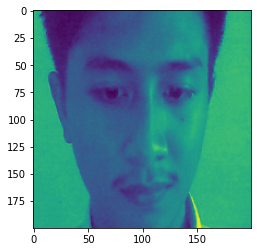

In [ ]:
for ima in Train[1000:1001]:
     img=mpimg.imread(ima)
     imgplot = plt.imshow(img)
     plt.show()

### **Data Preparation**

In [ ]:
nrows = 200
ncolumns = 200
channels = 3  

def read_and_process_image(list_of_images):
    
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'sample1' in image:
            y.append(0)
        elif 'sample2' in image:
            y.append(1)
        elif 'sample3' in image:
            y.append(2)
       

    
    return X, y

In [ ]:
X_train, y_train = read_and_process_image(Train)
X_val, y_val = read_and_process_image(Val)
#X_test, y_test = read_and_process_image(Test)

In [ ]:
gc.collect()

#Convert list to numpy array
X_train = np.array(X_train)
y_train= np.array(y_train)

X_val = np.array(X_val)
y_val= np.array(y_val)

"""
X_test = np.array(X_test)
y_test= np.array(y_test)
"""
print('Train:',X_train.shape,y_train.shape)
print('Val:',X_val.shape,y_val.shape)
#print('Test',X_test.shape,y_test.shape)

Train: (3360, 200, 200, 3) (3360,)
Val: (60, 200, 200, 3) (60,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Data Training')

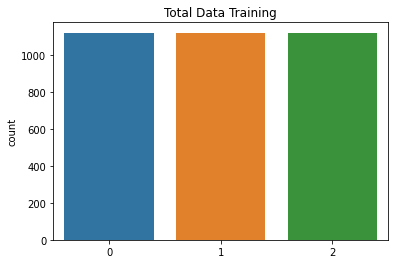

In [ ]:
sns.countplot(y_train)
plt.title('Total Data Training')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Data Validasi')

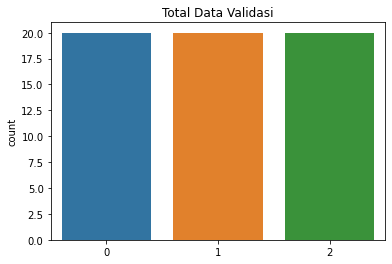

In [ ]:
sns.countplot(y_val)
plt.title('Total Data Validasi')

### **Define Model**

In [ ]:
IMG_SHAPE = (200, 200, 3)
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=IMG_SHAPE ))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 194, 194, 36)      5328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 97, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 114264)            0         
_________________________________________________________________
dense (Dense)                (None, 2024)              231272360 
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
105/105 [==============================] - 53s 207ms/step - loss: 48.9994 - accuracy: 0.5518 - val_loss: 0.0542 - val_accuracy: 0.9833
Epoch 2/100
105/105 [==============================] - 21s 197ms/step - loss: 0.1319 - accuracy: 0.9565 - val_loss: 0.0267 - val_accuracy: 0.9833
Epoch 3/100
105/105 [==============================] - 21s 199ms/step - loss: 0.0426 - accuracy: 0.9858 - val_loss: 0.0468 - val_accuracy: 0.9833
Epoch 4/100
105/105 [==============================] - 21s 198ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.0273 - val_accuracy: 0.9833
Epoch 5/100
105/105 [==============================] - 21s 198ms/step - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 6/100
105/105 [==============================] - 21s 200ms/step - loss: 0.0119 - accuracy: 0.9977 - val_loss: 0.0565 - val_accuracy: 0.9833
Epoch 7/100
105/105 [==============================] - 21s 200ms/step - loss: 0.0220 - accuracy: 0.9955 - val_loss: 0.1074 

In [ ]:
scor = model.evaluate( X_val,  y_val, verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.0116
test acc 0.9833


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


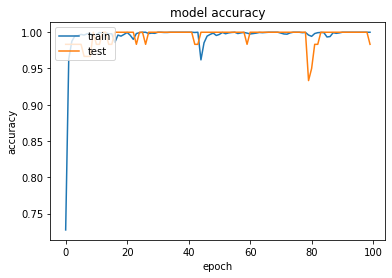

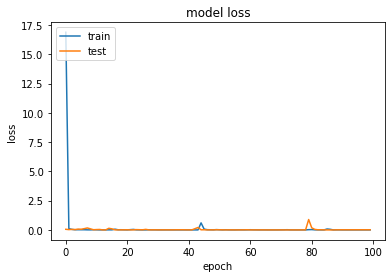

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('Weight_FR.h5') #save bobot 
#model.save('Model_FR.h5') #seluruh model